<a href="https://colab.research.google.com/github/unclepeddy/deeplearning/blob/master/simple_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tf-nightly-2.0-preview

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers, losses, optimizers, metrics
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.0.0-dev20190330


In [0]:
# Restrict dataset to max_words most frequent words
max_words = 10000

# Given list of word sequences, return list of one-hot encoded reviews
def vectorize_sequences(sequences, dimension=max_words):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

# Load labeled training and test data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=max_words)

# One-hot encode sentences and labels
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# Number of classification classes
num_classes = one_hot_train_labels.shape[1]
# Training hyperparams
num_epochs = 10
batch_size = 512
dense_layer_width = 64
validation_set_size = 1000

# Build and compile simple model: dense -> dense -> softmax classifier
model = models.Sequential()
model.add(layers.Dense(dense_layer_width, activation='relu', input_shape=(max_words,)))
model.add(layers.Dense(dense_layer_width, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

# Set aside first 1000 data points for validation
x_val = x_train[:validation_set_size]
y_val = one_hot_train_labels[:validation_set_size]
partial_x_train = x_train[validation_set_size:]
partial_y_train = one_hot_train_labels[validation_set_size:]

# Train the model for num_epochs epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 3s 341us/sample - loss: 2.7170 - categorical_accuracy: 0.5322 - val_loss: 1.8460 - val_categorical_accuracy: 0.6500
Epoch 2/10
7982/7982 [==============================] - 1s 186us/sample - loss: 1.4910 - categorical_accuracy: 0.7001 - val_loss: 1.3562 - val_categorical_accuracy: 0.7070
Epoch 3/10
7982/7982 [==============================] - 1s 187us/sample - loss: 1.0930 - categorical_accuracy: 0.7670 - val_loss: 1.1547 - val_categorical_accuracy: 0.7500
Epoch 4/10
7982/7982 [==============================] - 2s 189us/sample - loss: 0.8559 - categorical_accuracy: 0.8207 - val_loss: 1.0632 - val_categorical_accuracy: 0.7730
Epoch 5/10
7982/7982 [==============================] - 1s 187us/sample - loss: 0.6816 - categorical_accuracy: 0.8619 - val_loss: 0.9618 - val_categorical_accuracy: 0.8150
Epoch 6/10
7982/7982 [==============================] - 1s 187us/sample - loss: 0.5435 - cat

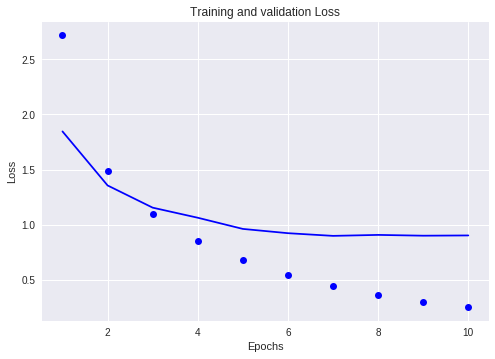

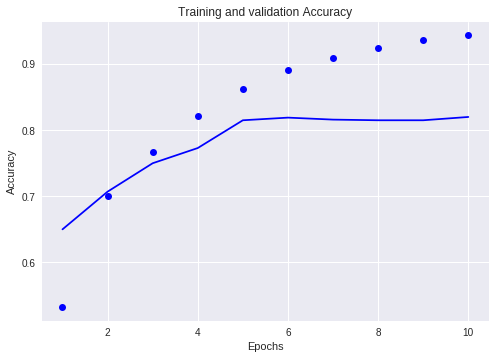

In [10]:
# Graph the training statistics
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Plot accuracy and loss for training and validation
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()